In [2]:
import pytesseract
from PIL import Image

In [3]:
img =Image.open("../images/2.3 test.png")

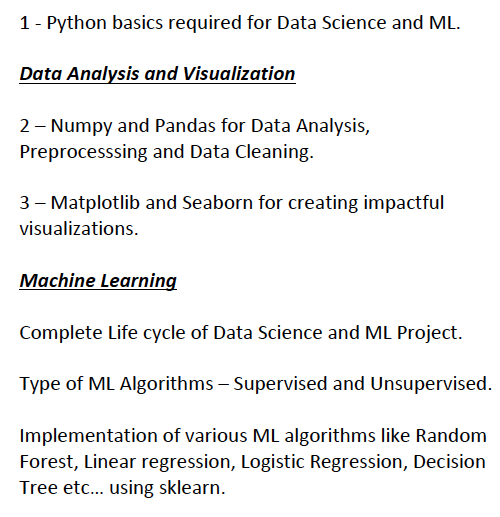

In [4]:
img

In [5]:
text = pytesseract.image_to_string(img)

In [6]:
text

'1 - Python basics required for Data Science and ML.\n\nData Analysis and Visualization\n\n2—Numpy and Pandas for Data Analysis,\nPreprocesssing and Data Cleaning.\n\n3 —Matplotlib and Seaborn for creating impactful\nvisualizations.\n\nMachine Learning\n\nComplete Life cycle of Data Science and ML Project.\nType of ML Algorithms — Supervised and Unsupervised.\nImplementation of various ML algorithms like Random\n\nForest, Linear regression, Logistic Regression, Decision\nTree etc... using sklearn.\n'

## How to determin important words and building boundaries around them

In [7]:
from pytesseract import Output
import cv2
from PIL import Image

In [8]:
img2 = cv2.imread("../images/test2.PNG")

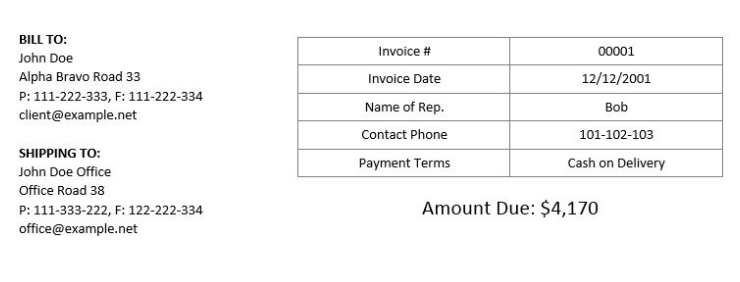

In [9]:
img1 = Image.open("../images/test2.PNG")
img1

In [10]:
data = pytesseract.image_to_data(img2,output_type=Output.DICT)
import cv2

In [11]:
data.keys()
type(img2)

numpy.ndarray

In [12]:
n_boxes = len(data["text"])

for i in range(n_boxes):
    if int(data['conf'][i])  >  60:
        (x,y,w,h) = (data["left"][i],data["top"][i],data["width"][i],data["height"][i])
        img = cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)


# cv2.imshow("img2",img2) 

# cv2.waitKey(0)

## text template matching

In [13]:
import re
import cv2
import pytesseract
from pytesseract import Output
from PIL import Image


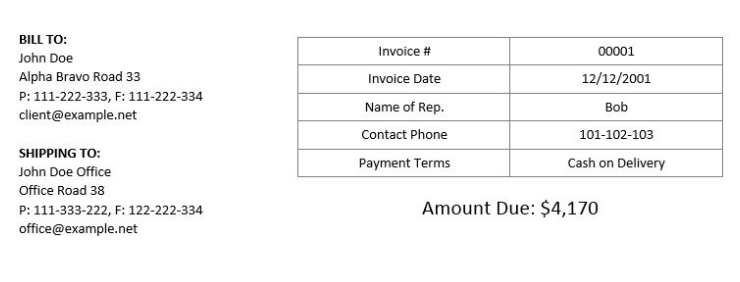

In [14]:
img4 = cv2.imread("../images/test3.png")

Image.open("../images/test3.png")



In [15]:
d = pytesseract.image_to_data(img4,output_type=Output.DICT)


In [16]:
keys = list(d.keys())

In [17]:
data_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

In [18]:
n_boxes = len(d["text"])

for i in range(n_boxes):
    if int(d["conf"][i]) > 60:
        if re.match(data_pattern, d["text"][i]):
            (x,y,w,h) = (d["left"][i],d["top"][i],d["width"][i],d["height"][i])
            img4 = cv2.rectangle(img4,(x,y),(x+w,y+h),(0,255,0),2)

# cv2.imshow("img4",img4)
# cv2.waitKey(0)
# img4

## Detecting license plate information

In [19]:
import pytesseract
import cv2
import imutils



In [20]:
img5 = cv2.imread("../images/test5.PNG")

In [21]:
image5 = imutils.resize(img5,width=300)
# cv2.imshow("img5",image5)
# cv2.waitKey(0)

In [22]:
gray_image = cv2.cvtColor(image5,cv2.COLOR_RGB2GRAY)

# cv2.imshow("gray",gray_image)
# cv2.waitKey(0)

In [23]:
gray_image = cv2.bilateralFilter(gray_image,11,17,17)
# cv2.imshow("gray clear img",gray_image)
# cv2.waitKey(0)

In [24]:
edged = cv2.Canny(gray_image,30,200)
# cv2.imshow("edged",edged)
# cv2.waitKey(0)

In [25]:
cnts,new = cv2.findContours(edged.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [26]:
image6 = image5.copy()
cv2.drawContours(image6,cnts,-1,(0,255,0),3)

array([[[ 34,  54,  77],
        [ 31,  52,  75],
        [ 32,  52,  77],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 28,  51,  69],
        [ 26,  49,  69],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 32,  54,  73],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[ 42,  56,  55],
        [ 42,  56,  55],
        [ 42,  56,  55],
        ...,
        [ 36,  41,  44],
        [ 36,  41,  44],
        [ 36,  41,  44]],

       [[ 42,  56,  55],
        [ 42,  56,  55],
        [ 42,  56,  55],
        ...,
        [ 35,  40,  43],
        [ 36,  41,  44],
        [ 36,  41,  44]],

       [[ 42,  56,  54],
        [ 44,  57,  54],
        [ 43,  56,  54],
        ...,
        [ 36,  41,  44],
        [ 36,  41,  44],
        [ 36,  41,  44]]

In [27]:
# cv2.imshow("contours",image6)
# cv2.waitKey(0)

In [28]:
cnts = sorted(cnts,key=cv2.contourArea,reverse=True) [:30]
screenCnt = None
image7 = image5.copy()
cv2.drawContours(image7, cnts,-1,(0,255,0),3)
# cv2.imshow("top 30 contours",image7)
# cv2.waitKey(0)

array([[[ 34,  54,  77],
        [ 31,  52,  75],
        [ 32,  52,  77],
        ...,
        [110, 118, 108],
        [147, 153, 139],
        [171, 175, 160]],

       [[ 28,  51,  69],
        [ 26,  49,  69],
        [ 31,  56,  77],
        ...,
        [ 95, 103, 102],
        [102, 112, 105],
        [129, 138, 127]],

       [[ 32,  54,  73],
        [ 29,  53,  73],
        [ 38,  64,  86],
        ...,
        [103, 104, 109],
        [ 99, 101, 105],
        [ 80,  84,  83]],

       ...,

       [[ 42,  56,  55],
        [ 42,  56,  55],
        [ 42,  56,  55],
        ...,
        [ 36,  41,  44],
        [ 36,  41,  44],
        [ 36,  41,  44]],

       [[ 42,  56,  55],
        [ 42,  56,  55],
        [ 42,  56,  55],
        ...,
        [ 35,  40,  43],
        [ 36,  41,  44],
        [ 36,  41,  44]],

       [[ 42,  56,  54],
        [ 44,  57,  54],
        [ 43,  56,  54],
        ...,
        [ 36,  41,  44],
        [ 36,  41,  44],
        [ 36,  41,  44]]

In [29]:
i = 7
for c in cnts:
    perimeter = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.018 * perimeter,True)
    if len(approx)==4:
        screenCnt = approx
        x,y,w,h = cv2.boundingRect(c)
        new_img = image5[y:y+h,x:x+w]
        cv2.imwrite('./'+str(i)+'.png',new_img)
        i+1
        break

In [30]:
cv2.drawContours(image5,[screenCnt],-1,(0,255,0),3)
# cv2.imshow("imaged with dected license",image5)
# cv2.waitKey(0)

array([[[ 34,  54,  77],
        [ 31,  52,  75],
        [ 32,  52,  77],
        ...,
        [110, 118, 108],
        [147, 153, 139],
        [171, 175, 160]],

       [[ 28,  51,  69],
        [ 26,  49,  69],
        [ 31,  56,  77],
        ...,
        [ 95, 103, 102],
        [102, 112, 105],
        [129, 138, 127]],

       [[ 32,  54,  73],
        [ 29,  53,  73],
        [ 38,  64,  86],
        ...,
        [103, 104, 109],
        [ 99, 101, 105],
        [ 80,  84,  83]],

       ...,

       [[ 42,  56,  55],
        [ 42,  56,  55],
        [ 42,  56,  55],
        ...,
        [ 36,  41,  44],
        [ 36,  41,  44],
        [ 36,  41,  44]],

       [[ 42,  56,  55],
        [ 42,  56,  55],
        [ 42,  56,  55],
        ...,
        [ 35,  40,  43],
        [ 36,  41,  44],
        [ 36,  41,  44]],

       [[ 42,  56,  54],
        [ 44,  57,  54],
        [ 43,  56,  54],
        ...,
        [ 36,  41,  44],
        [ 36,  41,  44],
        [ 36,  41,  44]]

In [31]:
cropped_loc = './7.png'
cv2.imshow("imaged with dected license",cv2.imread(cropped_loc))
plate = pytesseract.image_to_string(cropped_loc,lang="eng")
print(plate)

MH12DE1433

